In [1]:
import pandas as pd

### Visualing relationship between Economic Indicators from 3 datasets

In [2]:
df_1 = pd.read_csv(r"C:\Users\sahno\Downloads\1 - India_Economic_Growth_Historical_Data.csv", encoding = 'iso-8859-1')

In [3]:
df_1.head()

,Unnamed: 0,year,GDP,Per_Capita,Annual_percent_geowth
0,0,2022,"$3,416.65B","$2,411",7.24%
1,1,2021,"$3,150.31B","$2,238",9.05%
2,2,2020,"$2,671.60B","$1,913",-5.83%
3,3,2019,"$2,835.61B","$2,050",3.87%
4,4,2018,"$2,702.93B","$1,974",6.45%


In [4]:
df_1.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df_1.rename(columns={"Annual_percent_geowth": "Annual_percent_growth"}, inplace=True)
df_1.head()

,year,GDP,Per_Capita,Annual_percent_growth
0,2022,"$3,416.65B","$2,411",7.24%
1,2021,"$3,150.31B","$2,238",9.05%
2,2020,"$2,671.60B","$1,913",-5.83%
3,2019,"$2,835.61B","$2,050",3.87%
4,2018,"$2,702.93B","$1,974",6.45%


In [6]:
df_1 = df_1.sort_values(by='year', ascending=True)

In [7]:
# Reset the index to maintain a clean index
df_1 = df_1.reset_index(drop=True)

In [8]:
df_1.duplicated().sum()

0

In [9]:
df_1.isnull().sum()

year                     0
GDP                      0
Per_Capita               0
Annual_percent_growth    0
dtype: int64

In [10]:
df_1.head()

,year,GDP,Per_Capita,Annual_percent_growth
0,1960,$37.03B,$83,0.00%
1,1961,$39.23B,$86,3.72%
2,1962,$42.16B,$90,2.93%
3,1963,$48.42B,$101,5.99%
4,1964,$56.48B,$115,7.45%


In [11]:
df_1.dtypes

year                      int64
GDP                      object
Per_Capita               object
Annual_percent_growth    object
dtype: object

In [12]:
df_1.shape

(63, 4)

In [13]:
df_1.describe()

,year
count,63.000000
mean,1991.000000
std,18.330303
min,1960.000000
25%,1975.500000
50%,1991.000000
75%,2006.500000
max,2022.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [15]:
df_1.head()

,year,GDP,Per_Capita,Annual_percent_growth
0,1960,$37.03B,$83,0.00%
1,1961,$39.23B,$86,3.72%
2,1962,$42.16B,$90,2.93%
3,1963,$48.42B,$101,5.99%
4,1964,$56.48B,$115,7.45%


In [16]:
# Convert the columns values to numeric so as to use them for plotting purpose
df_1['GDP'] = df_1['GDP'].replace({'\$': '', ',': '', 'B': ''}, regex=True).astype(float)
df_1['Per_Capita'] = df_1['Per_Capita'].replace({'\$':' ', ',': ''},regex=True).astype(float)
df_1['Annual_percent_growth'] = df_1['Annual_percent_growth'].replace({'%': ''}, regex=True).astype(float)

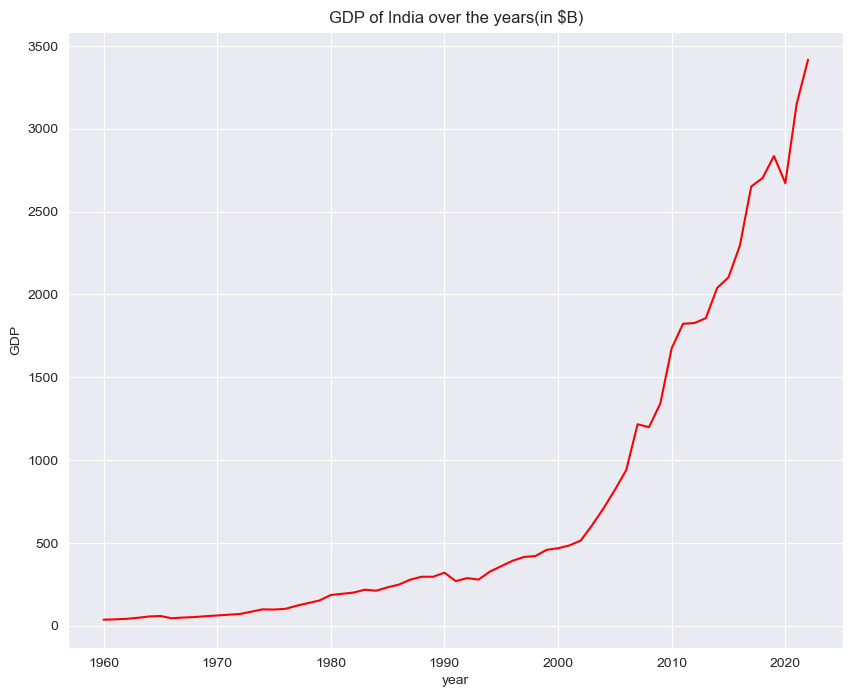

In [25]:
plt.figure(figsize=(10,8))
plt.title('GDP of India over the years(in $B)')
sns.lineplot(data = df_1, x='year', y='GDP',color='red')
sns.set_style("darkgrid")
plt.show()

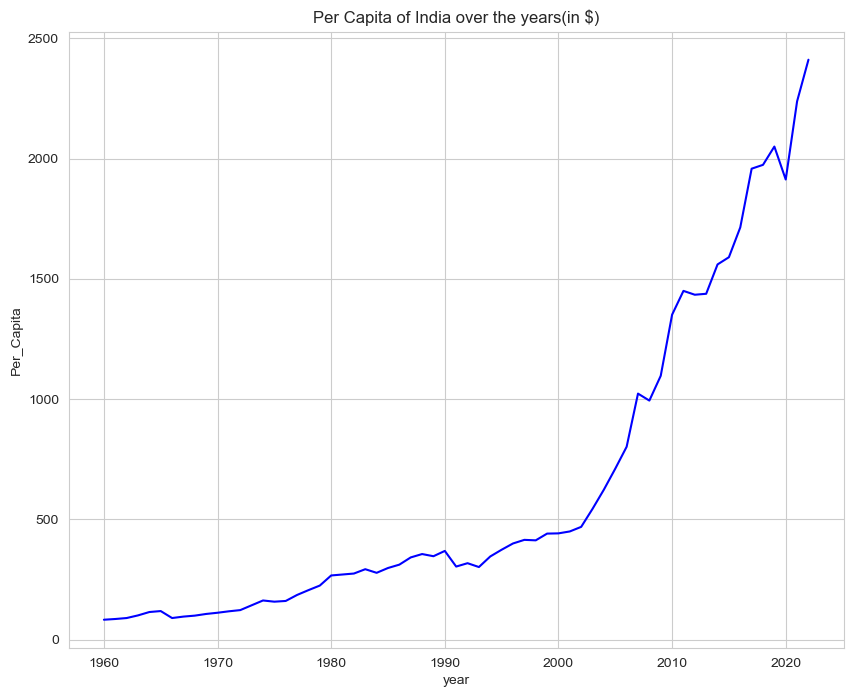

In [23]:
plt.figure(figsize=(10,8))
plt.title('Per Capita of India over the years(in $)')
sns.lineplot(data = df_1, x='year', y='Per_Capita',color="blue")
sns.set_style("whitegrid")
plt.show()

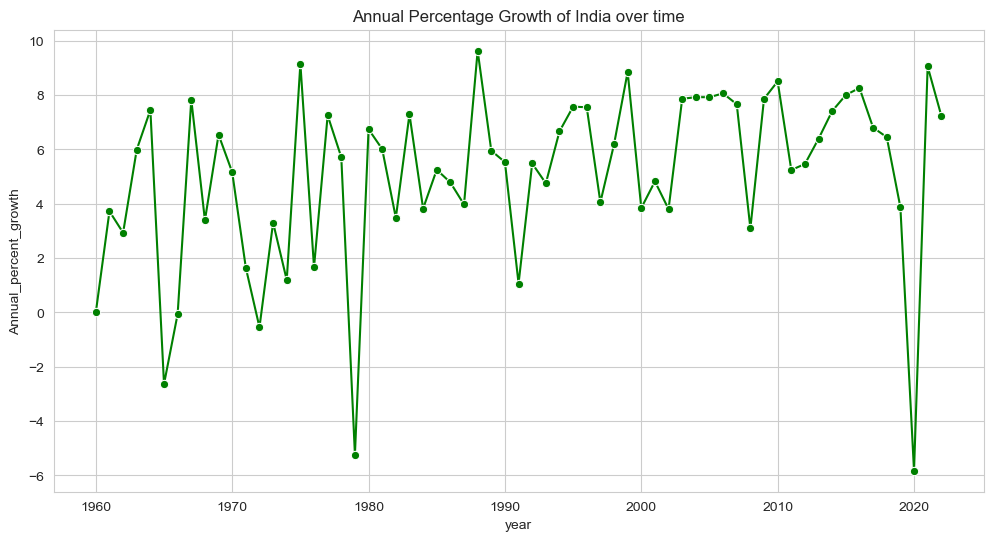

In [20]:
plt.figure(figsize=(12,6))
plt.title('Annual Percentage Growth of India over time')
sns.lineplot(data= df_1, x= 'year', y= 'Annual_percent_growth',color='green', marker='o')
sns.set_style('whitegrid')
plt.show()

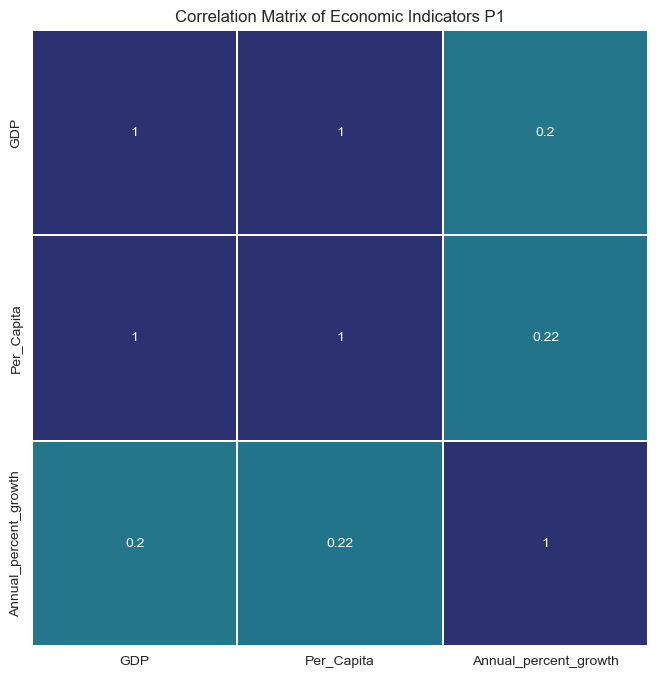

In [68]:
correlated_columns = ['GDP', 'Per_Capita', 'Annual_percent_growth']
correlation_matrix_1 = df_1[correlated_columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0,linewidths=0.2, cmap="crest",square=True,cbar=False)
plt.title('Correlation Matrix of Economic Indicators P1')
plt.show()

In [27]:
df_2 = pd.read_csv(r"C:\Users\sahno\Downloads\2 -India_GDP_Growth_Rate_Historical_Data.csv", encoding= 'iso-8859-1')

In [28]:
df_2

,Unnamed: 0,year,GDP_growth,Annual_Change
0,0,2022,7.24%,-1.81%
1,1,2021,9.05%,14.88%
2,2,2020,-5.83%,-9.70%
3,3,2019,3.87%,-2.58%
4,4,2018,6.45%,-0.34%
...,...,...,...,...
58,58,1964,7.45%,1.46%
59,59,1963,5.99%,3.06%
60,60,1962,2.93%,-0.79%
61,61,1961,3.72%,3.72%


In [29]:
df_2.drop("Unnamed: 0",axis=1,inplace=True)

In [30]:
df_2.isnull().sum()

year             0
GDP_growth       0
Annual_Change    0
dtype: int64

In [31]:
df_2 = df_2.sort_values(by='year', ascending=True)
# Reset the index to maintain a clean index
df_2 = df_2.reset_index(drop=True)

In [32]:
df_2.dtypes

year              int64
GDP_growth       object
Annual_Change    object
dtype: object

In [33]:
df_2.head()

,year,GDP_growth,Annual_Change
0,1960,0.00%,3.72%
1,1961,3.72%,3.72%
2,1962,2.93%,-0.79%
3,1963,5.99%,3.06%
4,1964,7.45%,1.46%


In [34]:
# Convert the columns values to numeric so as to use them for plotting purpose
df_2['GDP_growth'] = df_2['GDP_growth'].replace({'%':''},regex=True).astype(float)
df_2['Annual_Change'] = df_2['Annual_Change'].replace({'%': ''}, regex=True).astype(float)

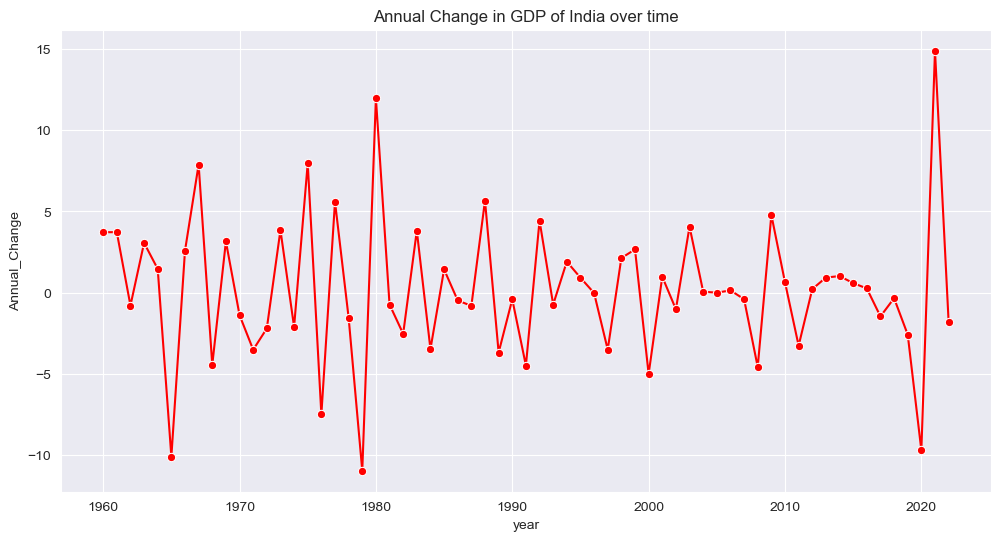

In [35]:
plt.figure(figsize=(12,6))
plt.title('Annual Change in GDP of India over time')
sns.lineplot(data= df_2, x= 'year', y= 'Annual_Change',color='red', marker='o')
sns.set_style('whitegrid')
plt.show()

In [36]:
df_3= pd.read_csv(r"C:\Users\sahno\Downloads\5 - India_GNI_Historical_Data.csv",encoding='iso-8859-1')

In [37]:
df_3.head()

,Unnamed: 0,year,Per_Capita,GNI,Annual_Change
0,0,2022,"$3,385.77B","$2,390",7.20%
1,1,2021,"$3,019.86B","$2,150",8.30%
2,2,2020,"$2,659.60B","$1,900",-6.20%
3,3,2019,"$2,878.54B","$2,080",4.00%
4,4,2018,"$2,713.33B","$1,980",6.47%


### here the column names seem to be interchnaged as GNI is greater than Per Capita ...so we have to interchange the column names

In [38]:
df_3.rename(columns={"Per_Capita": "GNI",'GNI':'Per_Capita'}, inplace=True)

In [39]:
df_3.drop("Unnamed: 0",axis=1,inplace=True)

In [40]:
df_3.isnull().sum()

year             0
GNI              0
Per_Capita       0
Annual_Change    0
dtype: int64

In [41]:
df_3 = df_3.sort_values(by='year', ascending=True)
# Reset the index to maintain a clean index
df_3 = df_3.reset_index(drop=True)

In [42]:
df_3.dtypes

year              int64
GNI              object
Per_Capita       object
Annual_Change    object
dtype: object

In [43]:
df_3.head()

,year,GNI,Per_Capita,Annual_Change
0,1960,$B,$0,0.00%
1,1961,$B,$0,3.62%
2,1962,$41.17B,$90,2.90%
3,1963,$45.73B,$100,6.04%
4,1964,$52.54B,$110,7.41%


In [44]:
df_3.loc[[0,1],'GNI']= '$0B'
df_3.head()

,year,GNI,Per_Capita,Annual_Change
0,1960,$0B,$0,0.00%
1,1961,$0B,$0,3.62%
2,1962,$41.17B,$90,2.90%
3,1963,$45.73B,$100,6.04%
4,1964,$52.54B,$110,7.41%


In [45]:
# Convert the columns values to numeric so as to use them for plotting purpose
df_3['GNI'] = df_3['GNI'].replace({'\$': '', ',': '', 'B': ''}, regex=True).astype(float)
df_3['Per_Capita'] = df_3['Per_Capita'].replace({'\$':' ', ',': ''},regex=True).astype(float)
df_3['Annual_Change'] = df_3['Annual_Change'].replace({'%': ''}, regex=True).astype(float)

In [46]:
df_3.dtypes

year               int64
GNI              float64
Per_Capita       float64
Annual_Change    float64
dtype: object

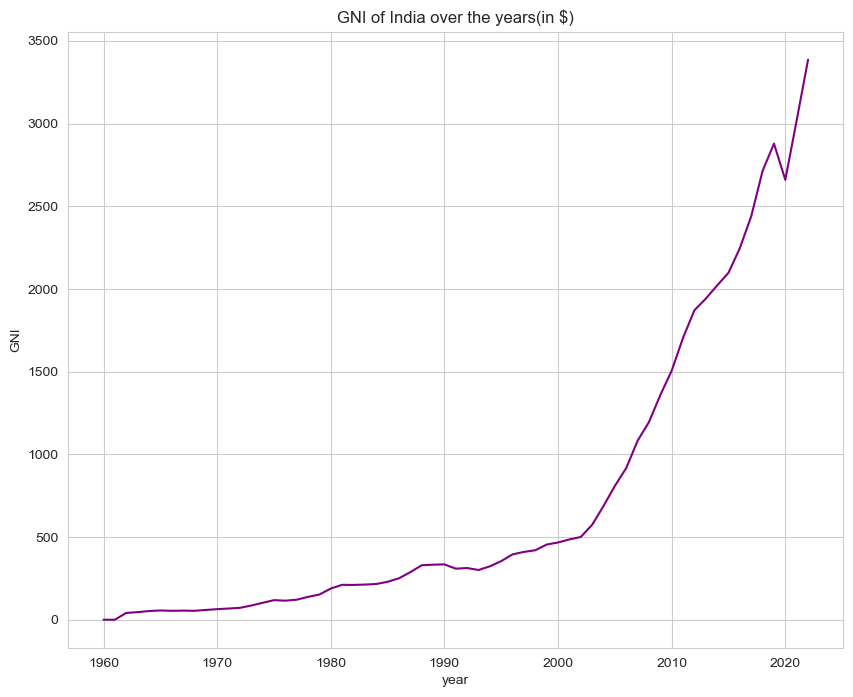

In [47]:
plt.figure(figsize=(10,8))
plt.title('GNI of India over the years(in $)')
sns.lineplot(data = df_3, x='year', y='GNI',color="purple")
sns.set_style("whitegrid")
plt.show()

In [48]:
merged_df = pd.merge(df_1,df_3,on='year')

In [49]:
merged_df

,year,GDP,Per_Capita_x,Annual_percent_growth,GNI,Per_Capita_y,Annual_Change
0,1960,37.03,83.0,0.00,0.00,0.0,0.00
1,1961,39.23,86.0,3.72,0.00,0.0,3.62
2,1962,42.16,90.0,2.93,41.17,90.0,2.90
3,1963,48.42,101.0,5.99,45.73,100.0,6.04
4,1964,56.48,115.0,7.45,52.54,110.0,7.41
...,...,...,...,...,...,...,...
58,2018,2702.93,1974.0,6.45,2713.33,1980.0,6.47
59,2019,2835.61,2050.0,3.87,2878.54,2080.0,4.00
60,2020,2671.60,1913.0,-5.83,2659.60,1900.0,-6.20
61,2021,3150.31,2238.0,9.05,3019.86,2150.0,8.30


In [53]:
merged_df.rename(columns={'Per_Capita_x':'Per_Capita_GDP','Per_Capita_y':'Per_Capita_GNI'},inplace=True)

In [56]:
merged_df.loc[[0,1],'GNI']= merged_df.loc[[0,1],'GDP'].values
merged_df.loc[[0,1],'Per_Capita_GNI']= merged_df.loc[[0,1],'Per_Capita_GDP'].values
merged_df.head()
#as almost similar values , so to just fill the missing values I did it

,year,GDP,Per_Capita_GDP,Annual_percent_growth,GNI,Per_Capita_GNI,Annual_Change
0,1960,37.03,83.0,0.00,37.03,83.0,0.00
1,1961,39.23,86.0,3.72,39.23,86.0,3.62
2,1962,42.16,90.0,2.93,41.17,90.0,2.90
3,1963,48.42,101.0,5.99,45.73,100.0,6.04
4,1964,56.48,115.0,7.45,52.54,110.0,7.41


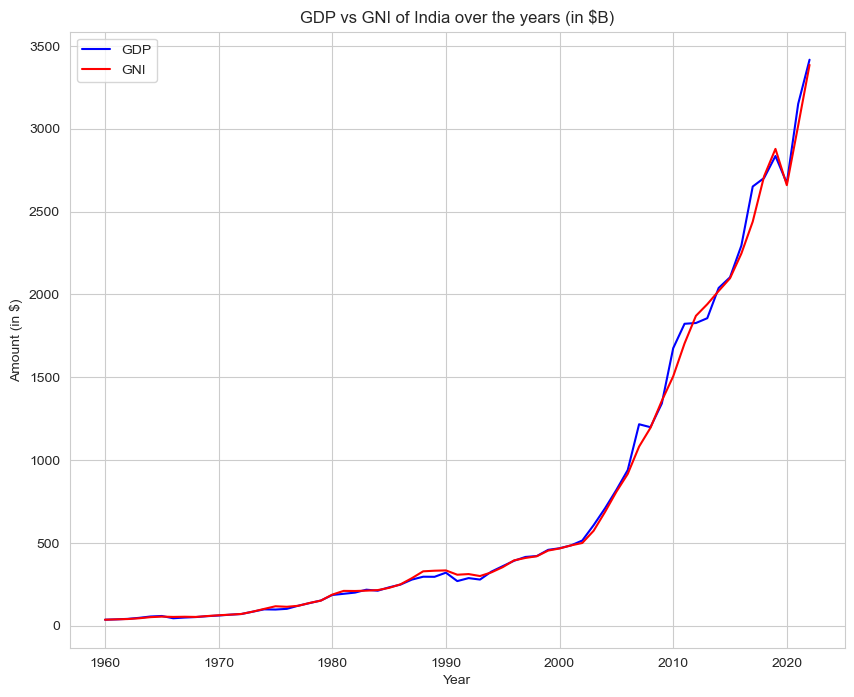

In [64]:
plt.figure(figsize=(10, 8))
plt.title('GDP vs GNI of India over the years (in $B)')
sns.lineplot(data=merged_df, x='year', y='GDP', color='blue', label='GDP')
sns.lineplot(data=merged_df, x='year', y='GNI', color='red', label='GNI')
plt.xlabel('Year')
plt.ylabel('Amount (in $)')
plt.legend()
sns.set_style('whitegrid')
plt.show()

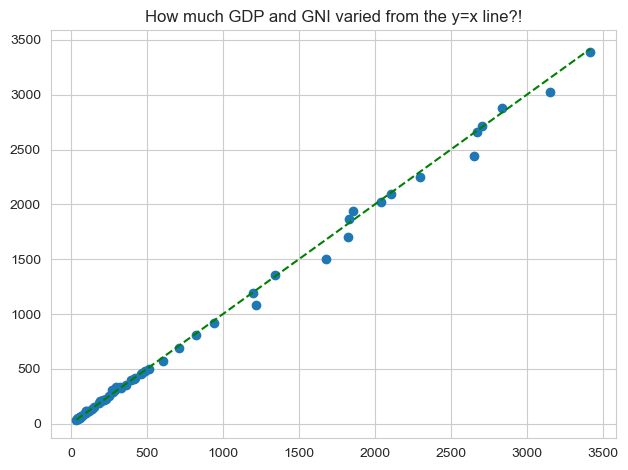

In [74]:
plt.title('How much GDP and GNI varied from the y=x line?!')
plt.scatter(x='GDP',y='GNI',data=merged_df)
# Add the line y=x for visualising the deviations
min_val = min(merged_df['GDP'].min(), merged_df['GNI'].min())
max_val = max(merged_df['GDP'].max(), merged_df['GNI'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--', label='y=x')
plt.tight_layout()
plt.show()

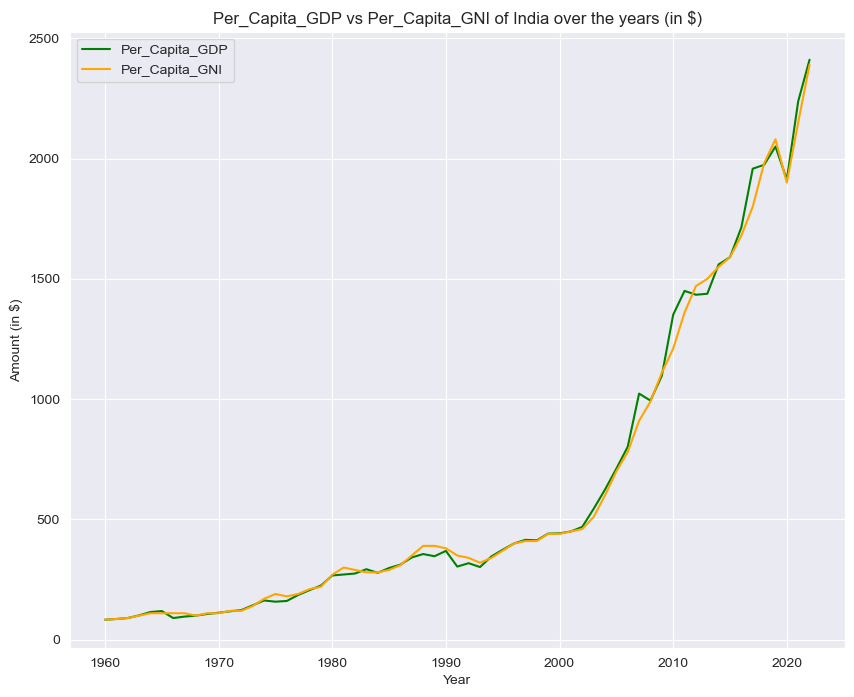

In [62]:
plt.figure(figsize=(10, 8))
plt.title('Per_Capita_GDP vs Per_Capita_GNI of India over the years (in $)')
sns.lineplot(data=merged_df, x='year', y='Per_Capita_GDP', color='green', label='Per_Capita_GDP')
sns.lineplot(data=merged_df, x='year', y='Per_Capita_GNI', color='orange', label='Per_Capita_GNI')
plt.xlabel('Year')
plt.ylabel('Amount (in $)')
plt.legend()
sns.set_style('darkgrid')
plt.show()

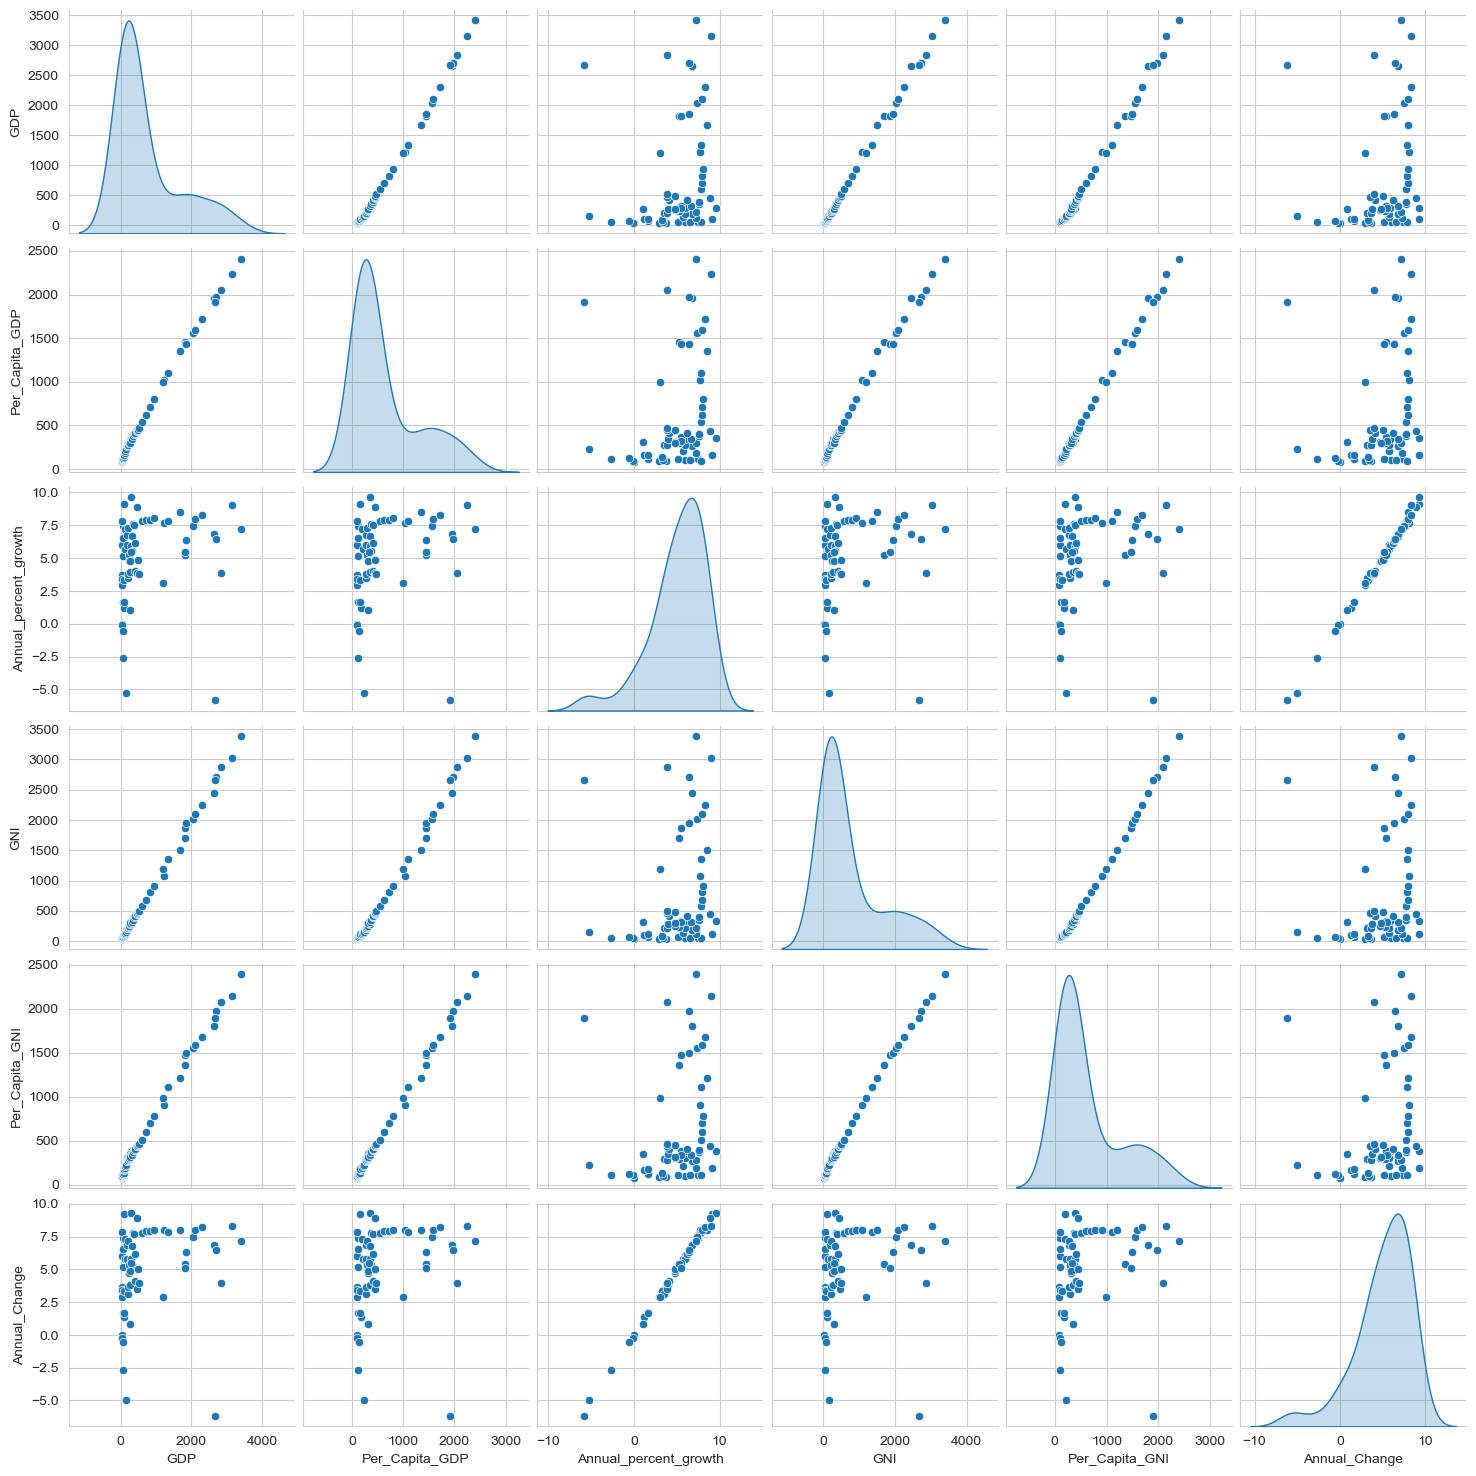

In [73]:
sns.pairplot(merged_df, vars=['GDP', 'Per_Capita_GDP', 'Annual_percent_growth','GNI','Per_Capita_GNI','Annual_Change'],  
             palette='crest',diag_kind= 'kde') 
plt.show()

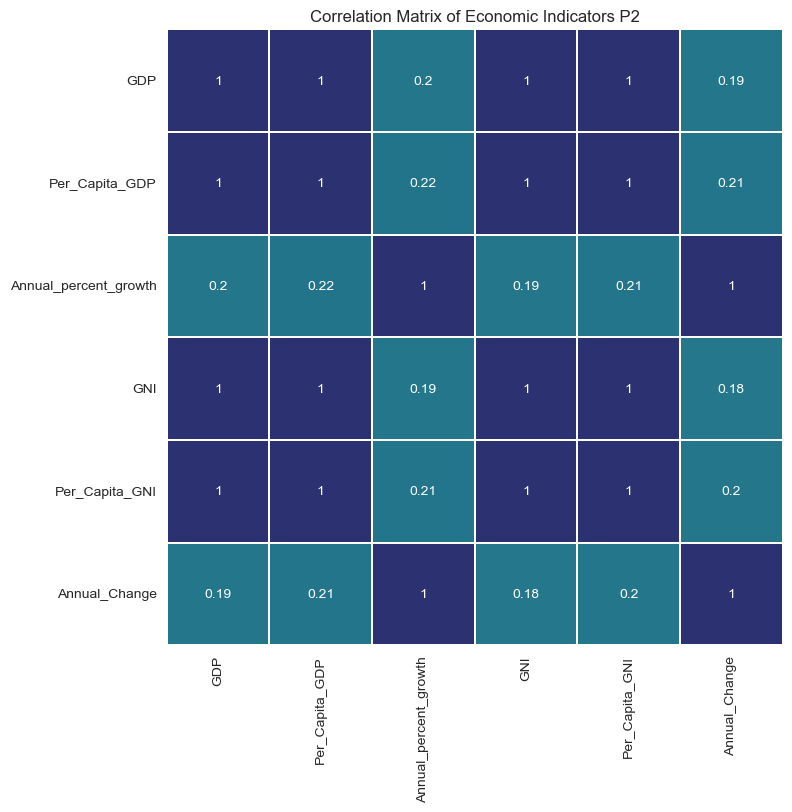

In [67]:
correlated_columns = ['GDP', 'Per_Capita_GDP', 'Annual_percent_growth','GNI','Per_Capita_GNI','Annual_Change']
correlation_matrix_2 = merged_df[correlated_columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, vmin=-1, vmax=1, center=0,linewidths=0.2, cmap="crest",square=True,cbar=False)
plt.title('Correlation Matrix of Economic Indicators P2')
plt.show()